### Pesudocode

```python
# initialization
import topogenesis, numpy, pandas, ...

# load the interpolated lattice
read sun_blockage.csv & turn into sunblockage_lattice_hi

# create different lattice from threshold
n_frames = 25
for i in range(0,n_frames+1):
    frames.append(sunblockage_lattice_hi > i/25)

# calculate how many voxels inside
n_voxel = []
for frame in frames:
    n_voxel.append(sum(np.array(frame).flatten()))

# choose threshold based on how many voxel needed
base_lattice = frame[14]

# visualization and saving
visualize
save to csv
```

In [ ]:
import os
import topogenesis as tg
import pyvista as pv
import trimesh as tm
import numpy as np
import pandas as pd

# convert mesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

In [2]:
# Run this part after running 'w+4_interpolation_sun_blockage'
lattice_path = os.path.relpath('../data/dynamic output/sun_blockage.csv')
sunblockage_lattice_hi = tg.lattice_from_csv(lattice_path)

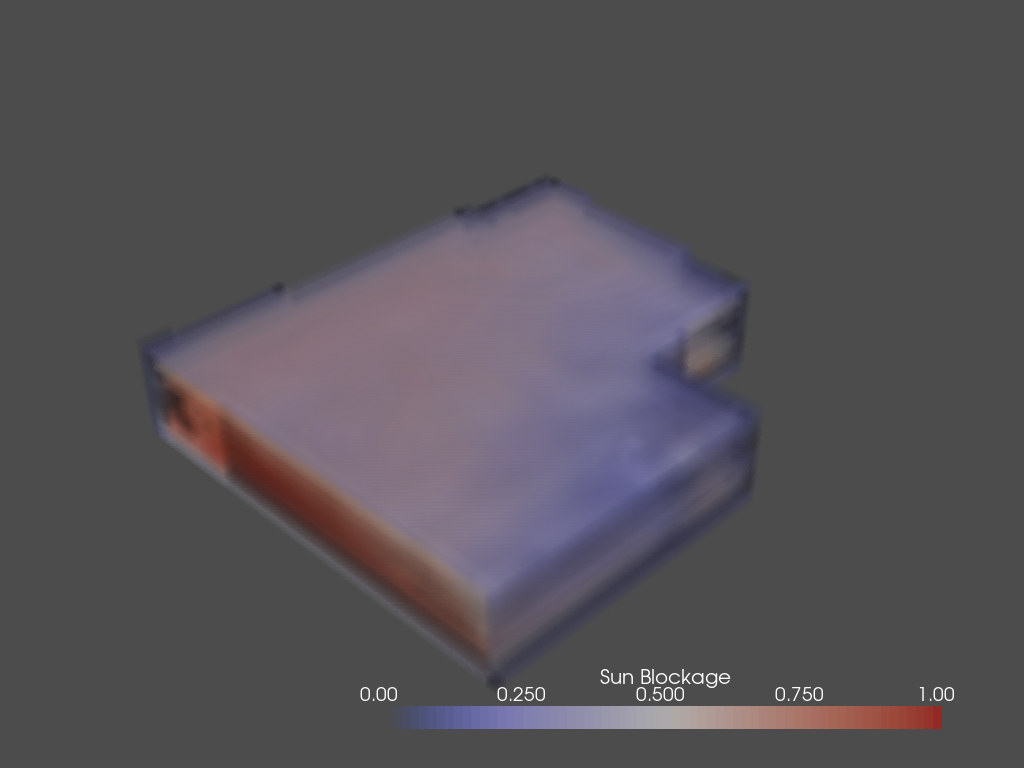

[(269.61191187360555, 188.61191187360552, 251.61191187360552),
 (36.000000000000014, -45.0, 18.0),
 (0.0, 0.0, 1.0)]

In [3]:
# initiating the plotter
p = pv.Plotter(notebook=True)

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values
grid.dimensions = sunblockage_lattice_hi.shape
# The bottom left corner of the data set
grid.origin = sunblockage_lattice_hi.minbound
# These are the cell sizes along each axis
grid.spacing = sunblockage_lattice_hi.unit

# Add the data values to the cell data
grid.point_arrays["Sun Blockage"] = sunblockage_lattice_hi.flatten(order="F")  # Flatten the Lattice

# adding the meshes
# p.add_mesh(tri_to_pv(context_mesh), opacity=0.1, style='wireframe')
    
# adding the volume
opacity = np.array([0,0.6,0.6,0.6,0.6,0.6,0.6])
p.add_volume(grid, cmap="coolwarm", clim=[0, 1.0],opacity=opacity, shade=True)

# plotting
p.show()

In [4]:
# Try cut the voxels based on shadow casted
n_frames = 25
frames = list()
for i in range(0,n_frames+1):
    frames.append(sunblockage_lattice_hi>i/25)

In [5]:
sizes_complete = pd.read_csv("../Data/raw data/Agent_sizes.csv")
Area = sizes_complete['Area']
print(sum(Area))
print(sum(Area)/(3.6**2))

46765
3608.4104938271603


In [6]:
n_voxel = []
for frame in frames:
    n_voxel.append(sum(np.array(frame).flatten()))

print(n_voxel[14])
base_lattice = frames[14]

6870


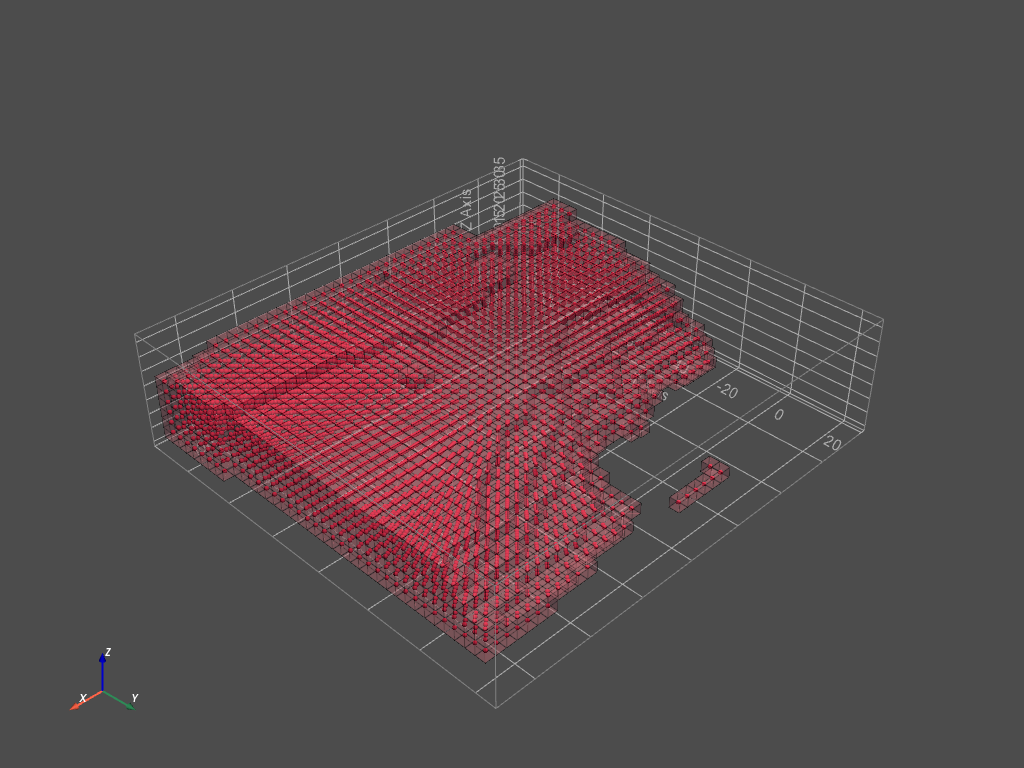

[(275.910778145043, 194.91077814504303, 257.91077778741516),
 (36.0, -45.0, 17.99999964237213),
 (0.0, 0.0, 1.0)]

In [7]:
p = pv.Plotter(notebook=True)

base_lattice.fast_vis(p)

# Set the grid dimensions: shape + 1 because we want to inject our values on the CELL data
grid = pv.UniformGrid()
grid.dimensions = np.array(base_lattice.shape) + 1
# The bottom left corner of the data set
grid.origin = base_lattice.minbound - base_lattice.unit * 0.5
# These are the cell sizes along each axis
grid.spacing = base_lattice.unit 

# adding the boundingbox wireframe
p.add_mesh(grid.outline(), color="grey", label="Domain")

# adding axes
p.add_axes()
p.show_bounds(grid="back", location="back", color="#aaaaaa")
p.show()

In [8]:
# p = pv.Plotter(notebook=True)

# base_lattice = frames[25]

# # Set the grid dimensions: shape + 1 because we want to inject our values on the CELL data
# grid = pv.UniformGrid()
# grid.dimensions = np.array(base_lattice.shape) + 1
# # The bottom left corner of the data set
# grid.origin = base_lattice.minbound - base_lattice.unit * 0.5
# # These are the cell sizes along each axis
# grid.spacing = base_lattice.unit 

# # adding the boundingbox wireframe
# p.add_mesh(grid.outline(), color="grey", label="Domain")

# # adding axes
# p.add_axes()
# p.show_bounds(grid="back", location="back", color="#aaaaaa")

# def create_mesh(value):
#     f = int(value)
#     lattice = frames[n_frames-f]
#     lattice.fast_vis(p)
#     return

# p.add_slider_widget(create_mesh, [0,n_frames], title='Threshold', value=0, event_type="always", style="classic")
# p.show(use_ipyvtk=True)

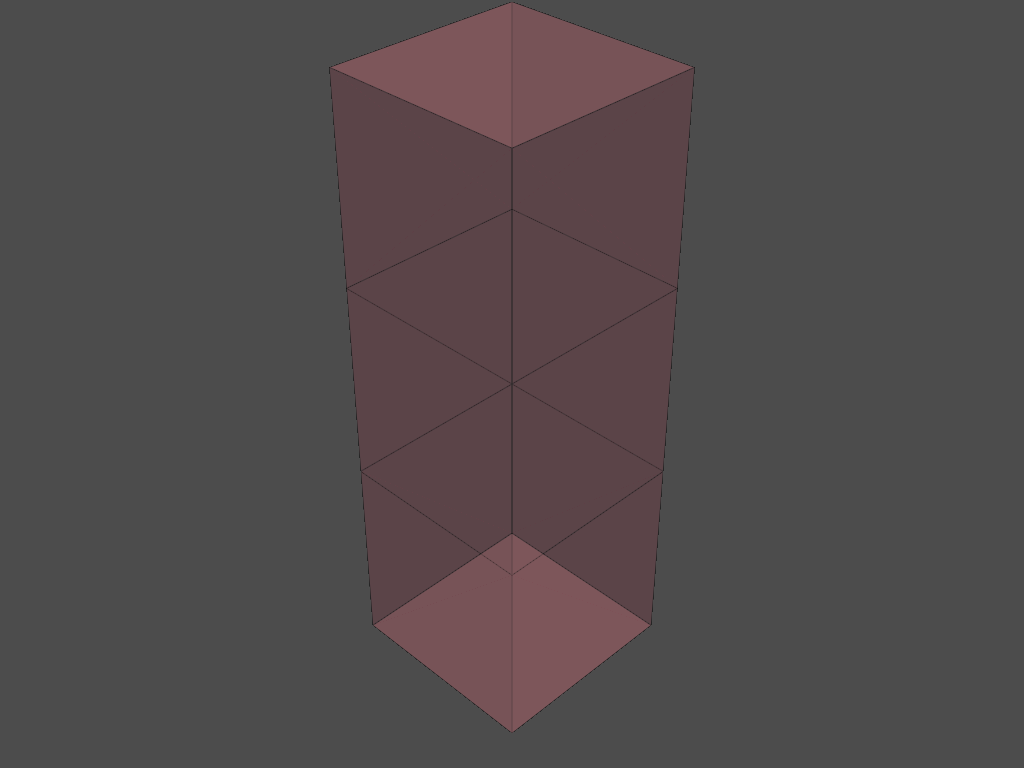

[(5.199214280684376, 5.199214280684376, 5.199214280684376),
 (1.5, 1.5, 1.5),
 (0.0, 0.0, 1.0)]

In [9]:
# creating neighborhood definition
stencil = tg.create_stencil("von_neumann", 0, 1)
# setting the center to zero
stencil.set_index([0,0,0], 1)
stencil.set_index([0,0,1], 1)
stencil.set_index([0,0,-1], 1)

p = pv.Plotter(notebook=True)
grid = pv.UniformGrid()

grid.dimensions = np.array(stencil.shape) + 1
grid.origin = [0,0,0]
grid.spacing = [1,1,1]

grid.cell_arrays["values"] = stencil.flatten(order="F")
threshed = grid.threshold([0.9, 1.1])

p.add_mesh(threshed, show_edges=True, color="#ff8fa3", opacity=0.3)
p.show()

In [10]:
insider = []
for i in base_lattice.find_neighbours(stencil):
    inside = False
    for n in i:
        neigh_3d_id = np.unravel_index(n, base_lattice.shape)
        if not base_lattice[neigh_3d_id]:
            inside = True
    if inside:
        insider.append(np.unravel_index(i[0], base_lattice.shape))

for i in insider:
    base_lattice[i[0],i[1],i[2]] = False

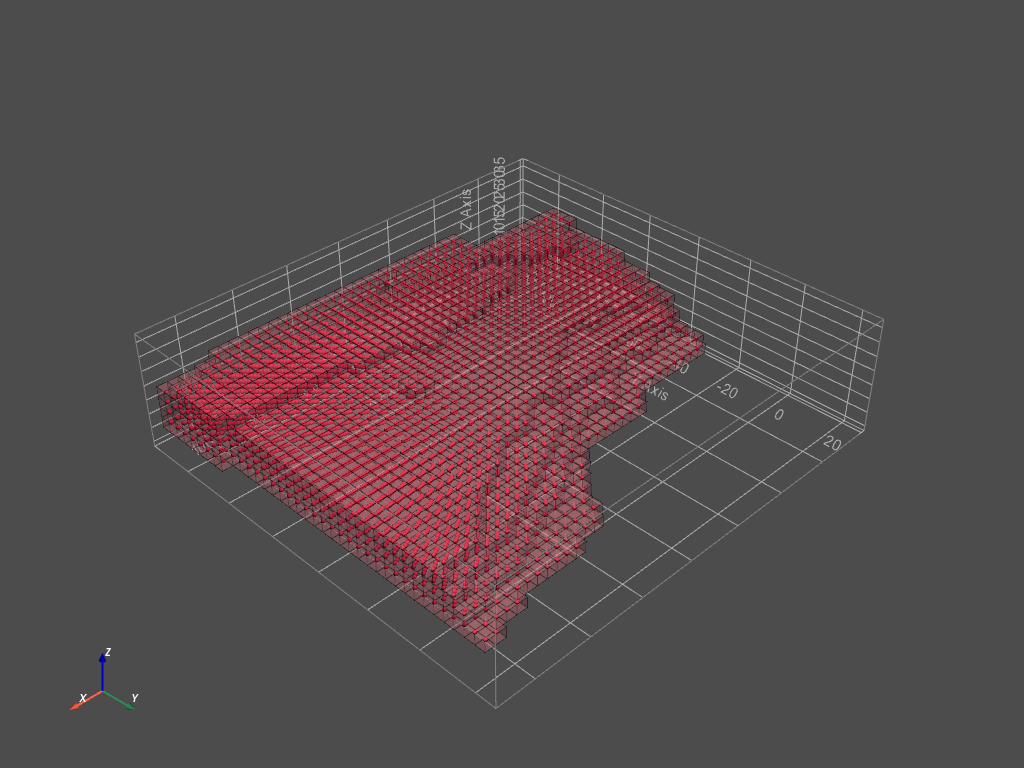

[(275.910778145043, 194.91077814504303, 257.91077778741516),
 (36.0, -45.0, 17.99999964237213),
 (0.0, 0.0, 1.0)]

In [11]:
p = pv.Plotter(notebook=True)

base_lattice.fast_vis(p)

# Set the grid dimensions: shape + 1 because we want to inject our values on the CELL data
grid = pv.UniformGrid()
grid.dimensions = np.array(base_lattice.shape) + 1
# The bottom left corner of the data set
grid.origin = base_lattice.minbound - base_lattice.unit * 0.5
# These are the cell sizes along each axis
grid.spacing = base_lattice.unit 

# adding the boundingbox wireframe
p.add_mesh(grid.outline(), color="grey", label="Domain")

# adding axes
p.add_axes()
p.show_bounds(grid="back", location="back", color="#aaaaaa")
p.show()

In [12]:
csv_path = os.path.relpath('../data/dynamic output/voxelized_envelope_cut.csv')
base_lattice.to_csv(csv_path)